# Visualizing impedance spectra

Plotting a basically formated impedance plot is as easy as 1, 2, 3...

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../../../')

from impedance.models.circuits import CustomCircuit

## 1. Read in data

In [2]:
data = np.genfromtxt('../../../data/exampleData.csv', delimiter=',')

frequencies = data[:,0]
Z = data[:,1] + 1j*data[:,2]

frequencies = frequencies[np.imag(Z) < 0]
Z = Z[np.imag(Z) < 0]

## 2. Fit a custom circuit

(If you want to just plot experimental data without fitting a model you should check out the `plotting.plot_*()` functions)

In [3]:
circuit = CustomCircuit(initial_guess=[.01, .005, .1, .005, .1, .001, 200], circuit='R_0-p(R_1,C_1)-p(R_1,C_1)-Wo_1')

circuit.fit(frequencies, Z)

print(circuit)


Circuit string: R_0-p(R_1,C_1)-p(R_1,C_1)-Wo_1
Fit: True

Initial guesses:
    R_0 = 1.00e-02 [Ohm]
    R_1 = 5.00e-03 [Ohm]
    C_1 = 1.00e-01 [F]
    R_1 = 5.00e-03 [Ohm]
    C_1 = 1.00e-01 [F]
  Wo_1_0 = 1.00e-03 [Ohm]
  Wo_1_1 = 2.00e+02 [sec]

Fit parameters:
    R_0 = 1.65e-02  (+/- 1.54e-04) [Ohm]
    R_1 = 8.77e-03  (+/- 1.89e-04) [Ohm]
    C_1 = 3.28e+00  (+/- 1.85e-01) [F]
    R_1 = 5.31e-03  (+/- 2.06e-04) [Ohm]
    C_1 = 2.32e-01  (+/- 1.90e-02) [F]
  Wo_1_0 = 6.37e-02  (+/- 2.03e-03) [Ohm]
  Wo_1_1 = 2.37e+02  (+/- 1.72e+01) [sec]



## 3. Plot the data and fit

### a. Interactive altair plot

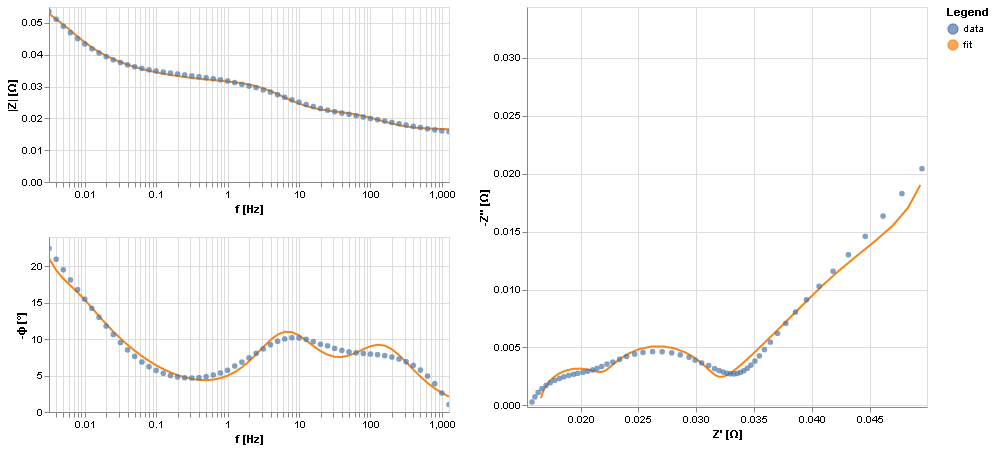

In [4]:
circuit.plot(f_data=frequencies, Z_data=Z)

### b. Nyquist plot via matplotlib

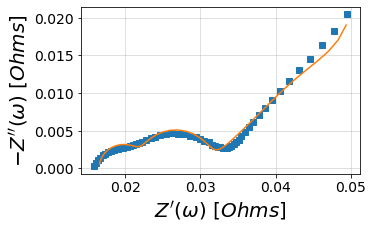

In [5]:
circuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
plt.show()

### c. Bode plot via matplotlib

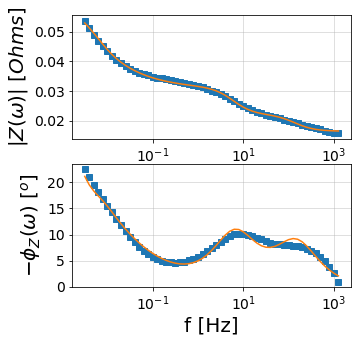

In [6]:
circuit.plot(f_data=frequencies, Z_data=Z, kind='bode')
plt.show()

### Bonus: Easy access to all the customization of matplotlib

Here we plot the data, changing the size of the figure, axes label fontsize, and turning off the grid by accessing the plt.Axes() object, ax


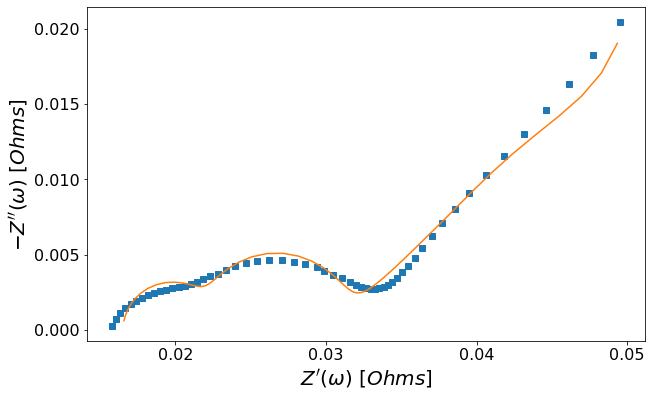

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax = circuit.plot(ax, frequencies, Z, kind='nyquist')

ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(False)

plt.show()